## Arima
from https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/

In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
from IPython.core.display import HTML
HTML("<style>.container{ width: 100% !important; }</style>")
pd.options.mode.chained_assignment = None     # default='warn'
import matplotlib.pyplot as plt
%matplotlib inline
# pd.set_option('display.max_columns', 10)      # used in __repr__ methods
# pd.set_option('display.width', 500)
pd.set_option('display.max_rows', 8)        # used in __repr__ methods

In [9]:
from pandas import Series
series = Series.from_csv('data/champagne.csv', header=0)
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')


Dataset 94, Validation 12


## What's the accuracy of prior value?

In [21]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    if i > len(test)-6:
        print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE accuracy: %.3f' % rmse)

>Predicted=5010.000, Expected=4874
>Predicted=4874.000, Expected=4633
>Predicted=4633.000, Expected=1659
>Predicted=1659.000, Expected=5951
>Predicted=5951.000, Expected=6981
RMSE accuracy: 3162.143


## Seasonality

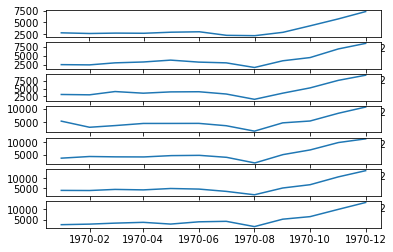

In [22]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
series = Series.from_csv('dataset.csv')
groups = series['1964':'1970'].groupby(TimeGrouper('A'))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
	pyplot.subplot((n_groups*100) + 10 + i)
	i += 1
	pyplot.plot(group)
pyplot.show()